# Analysis of Spotify Personal Data

### Importing Libraries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Cleaning data:
#### - loading all past streaming history
#### - concatenating all of the dataframes into one 
#### - dropping all duplicate rows
#### - dropping unknown song rows

In [68]:
stream_old = pd.read_csv('stream1.csv')
data1 = pd.read_json('lucia_streaming/StreamingHistory0.json')
data2 = pd.read_json('lucia_streaming/StreamingHistory1.json')
data3 = pd.read_json('lucia_streaming/StreamingHistory2.json')
data4 = pd.read_json('lucia_streaming/StreamingHistory3.json')
data5 = pd.read_json('lucia_streaming/StreamingHistory4.json')

df = pd.concat([stream_old,data1,data2,data3,data4,data5],axis = 0)
df.drop_duplicates()
df = df[~df.trackName.str.contains("Unknown Track", na=False)]
df = df.reset_index()

#### When using Jupyter Notebook, this cell allows you to see all of the output in a scrolling manner

In [69]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Creating new columns in the dataframe

In [70]:
df['time'] = [x[-5:] for x in df['endTime']]
df['date'] = [x[:10] for x in df['endTime']]
df['minutes'] = [x/60000 for x in df['msPlayed']]
df['hours'] = [x/60 for x in df['minutes']]

df.head(5)

,index,endTime,artistName,trackName,msPlayed,time,date,minutes,hours
0,0,2018-12-28 02:45,Freddie Mercury,There Must Be More To Life Than This,179600,02:45,2018-12-28,2.993333,0.049889
1,1,2018-12-28 02:46,Freddie Mercury,In My Defence - 2000 Remix,10419,02:46,2018-12-28,0.173650,0.002894
2,2,2018-12-28 02:51,Jerry Garcia,Mystery Train (Studio Jam) - Bonus Track,312640,02:51,2018-12-28,5.210667,0.086844
3,3,2018-12-28 02:51,Jerry Garcia,I'll Take A Melody,35416,02:51,2018-12-28,0.590267,0.009838
4,4,2018-12-28 02:52,Milky Chance,Doing Good,11583,02:52,2018-12-28,0.193050,0.003217


### Adding a column that displays the month for each play

In [71]:
monthz = []
for x in df['date']:
    if x[5:7] == '01':
        monthz.append('Janurary')
    elif x[5:7] == '02':
        monthz.append('Feburary')
    elif x[5:7] == '03':
        monthz.append('March')
    elif x[5:7] == '04':
        monthz.append('April')
    elif x[5:7] == '05':
        monthz.append('May')
    elif x[5:7] == '06':
        monthz.append('June')
    elif x[5:7] == '07':
        monthz.append('July')
    elif x[5:7] == '08':
        monthz.append('August')
    elif x[5:7] == '09':
        monthz.append('September')
    elif x[5:7] == '10':
        monthz.append('October')
    elif x[5:7] == '11':
        monthz.append('November')
    elif x[5:7] == '12':
        monthz.append('December')

df['month'] = monthz
df = df.drop(['msPlayed', 'endTime'], axis=1)
df.head(5)

,index,artistName,trackName,time,date,minutes,hours,month
0,0,Freddie Mercury,There Must Be More To Life Than This,02:45,2018-12-28,2.993333,0.049889,December
1,1,Freddie Mercury,In My Defence - 2000 Remix,02:46,2018-12-28,0.173650,0.002894,December
2,2,Jerry Garcia,Mystery Train (Studio Jam) - Bonus Track,02:51,2018-12-28,5.210667,0.086844,December
3,3,Jerry Garcia,I'll Take A Melody,02:51,2018-12-28,0.590267,0.009838,December
4,4,Milky Chance,Doing Good,02:52,2018-12-28,0.193050,0.003217,December


### A function to print out the date of the play in sentence format

In [72]:
def printingDates(date):
    year = date[:4]
    day = date[-2:]
    if date[5:7] == '01':
        month = 'Janurary'
    elif date[5:7] == '02':
        month = 'Feburary'
    elif date[5:7] == '03':
        month = 'March'
    elif date[5:7] == '04':
        month = 'April'
    elif date[5:7] == '05':
        month = 'May'
    elif date[5:7] == '06':
        month = 'June'
    elif date[5:7] == '07':
        month = 'July'
    elif date[5:7] == '08':
        month = 'August'
    elif date[5:7] == '09':
        month = 'September'
    elif date[5:7] == '10':
        month = 'October'
    elif date[5:7] == '11':
        month = 'November'
    elif date[5:7] == '12':
        month = 'December'
    return month + ' ' + day + ', ' + year

### Creating Variables that give sums of listening time

In [73]:
ms_played = df['minutes'].sum()
hours_played = df['hours'].sum()

### Focus on Artists

In [74]:
num_artists = df['artistName'].nunique()
top_artist = df['artistName'].value_counts().index[0]
top_artist_hours = df['artistName'].value_counts()[0]
top_10_artists = df['artistName'].value_counts().index[:10]
top_10_artists_plays = df['artistName'].value_counts()[:10]

def getArtistGraph():
    plt.figure(figsize=(12, 4))
    plt.title('Top 10 Artists')
    plt.bar(top_10_artists,top_10_artists_plays)
    plt.tight_layout()
    plt.xticks(rotation = 30)
    plt.xlabel('Artist Names')
    plt.ylabel('Play Counts')
    plt.show()

### Focus on Song Title

In [75]:
df['artistTrack'] = df['trackName']+' - ' +df['artistName']
num_songs = df['artistTrack'].nunique()
fav_song_plays = df['artistTrack'].value_counts()[0]
fav_song = df['artistTrack'].value_counts().index[0]
top_10_songs = df['artistTrack'].value_counts().index[:10]
top_10_songs_plays = df['artistTrack'].value_counts()[:10]

def getSongsGraph():
    plt.figure(figsize=(12, 4))
    plt.title('Top 10 Songs')
    plt.bar(top_10_songs,top_10_songs_plays)
    plt.tight_layout()
    plt.xticks(rotation = 60)
    plt.xlabel('Song Names')
    plt.ylabel('Play Counts')
    plt.show()

### Time in relation to artists

In [76]:
art_ms = df[['artistName','hours']]
art_ms.columns = ['artistName','hours']
art_ms = art_ms.groupby('artistName').sum()
top_10_hrs = art_ms.sort_values('hours',ascending = False)[:10]
top_10_hrs

def getHoursbyArtist():
    plt.figure(figsize=(12, 4))
    plt.title('Artist and Time Listened')
    plt.bar(top_10_hrs.index,top_10_hrs['hours'])
    plt.tight_layout()
    plt.xticks(rotation = 60)
    plt.xlabel('Artist Names')
    plt.ylabel('Hours Listened')
    plt.show()

### Top songs in relation to artist

In [77]:
def getGraphsforArtists():
    def topSongbyArtist():
        plt.figure(figsize=(12, 4))
        plt.title(f'Top songs by {top_10_artists[x]}')
        plt.bar(songs,counts)
        plt.tight_layout()
        plt.xticks(rotation = 60)
        plt.xlabel('Song Names')
        plt.ylabel('Times Listened')
        plt.show()


    x = 0
    while x <10:
        top_10_artists[x]
        artist_df = df[df['artistName'] == top_10_artists[x]]
        artist_songs = artist_df['trackName']
        artist_songs.value_counts()[:10]
        songs = artist_songs.value_counts().index[:10]
        counts = artist_songs.value_counts()[:10]
        topSongbyArtist()
        x+=1


### Hourly listening by month 

In [78]:
mon_hour = df[['month','hours']]
mon_hour = mon_hour.groupby(by = 'month', sort = False).sum()


def hoursByMonth():
    plt.figure(figsize=(12, 4))
    plt.title('Monthly Listening')
    plt.bar(mon_hour.index,mon_hour['hours'])
    plt.tight_layout()
    plt.xticks(rotation = 60)
    plt.xlabel('Months')
    plt.ylabel('Hours Listened')
    plt.show()

### Listening times histogram

In [79]:
times = df['time']
times = [x.replace(':','.') for x in times]
times = [round(float(x),0) for x in times]
times = pd.Series(times)

def getTimeGraph():
    plt.hist(times)
    plt.xlim(0,24)
    numbers=[x for x in range(0,24)]
    labels=map(lambda x: str(x), numbers)
    plt.xticks(numbers, labels)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('Time Distribution of Listening')
    plt.show()

### Creating variables for start date and last date of data 

In [80]:
firstdate = df['date'][0]
lastdate = df['date'][len(df) - 1]

From December 28, 2018 to August 09, 2020 you listened to 4178.62 hours of music

During this time you listened to:
3447 different artists
16417 different songs
 
You seem to really like Hippo Campus, you listened to their songs a total of 2505 times!
Your favorite song seemed to be 12:51 - The Strokes, you listened to it 148 times

Here's a graph of your top 10 artists:


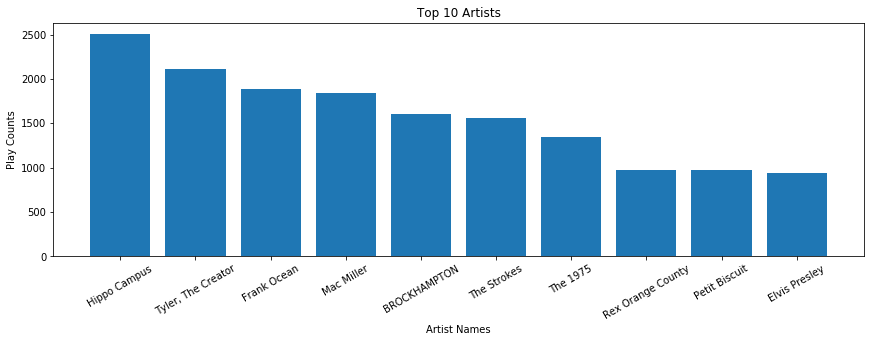

None

Here's a graph of your top 10 songs:


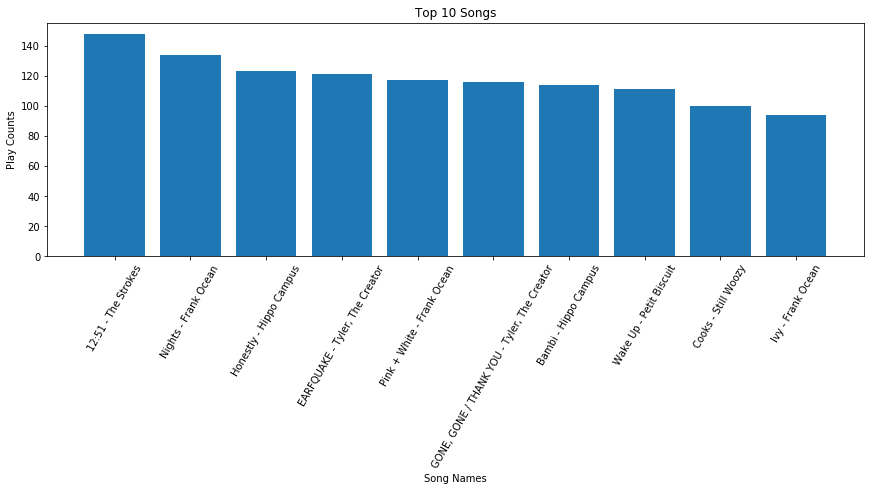

None

Here's how long you listened to each top artist:


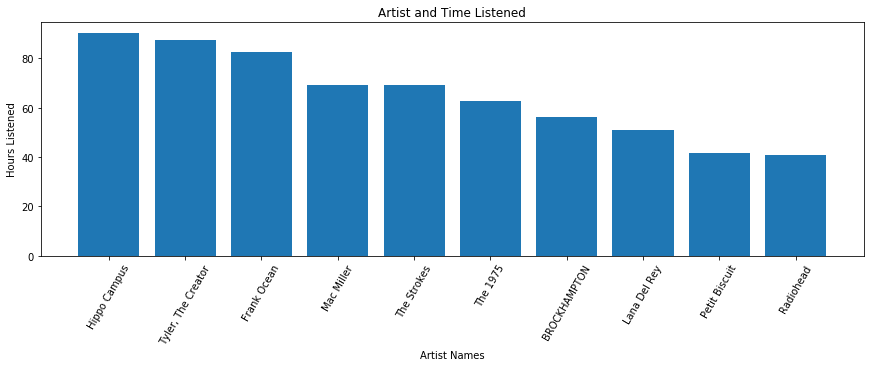

None

Let's look further into your favorite artists:


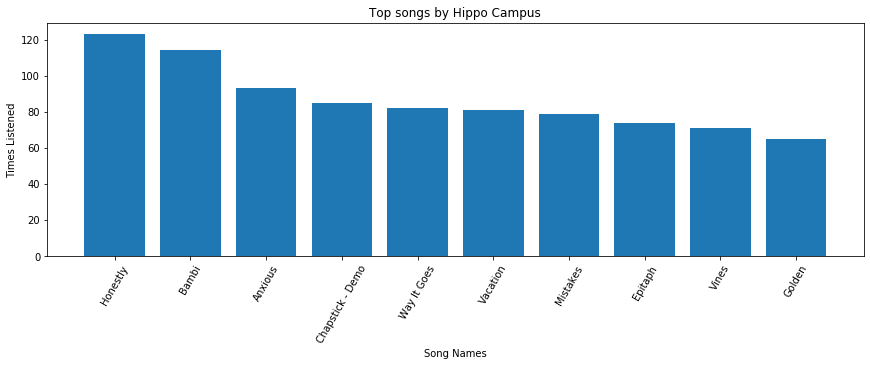

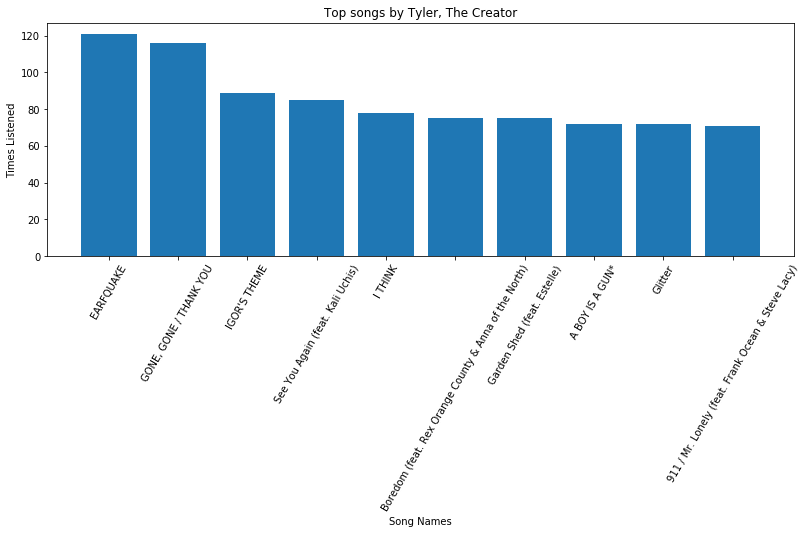

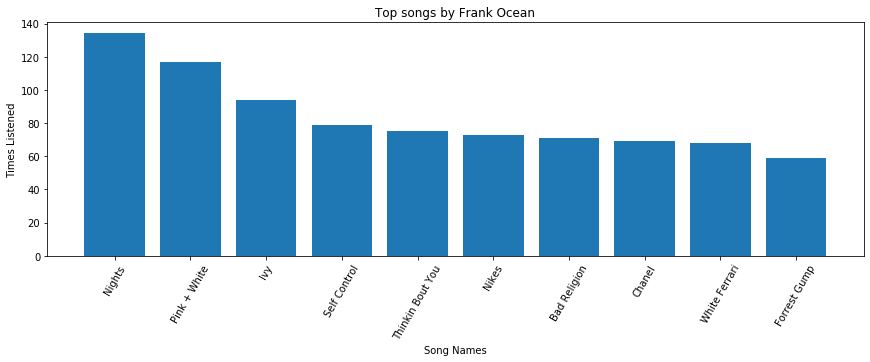

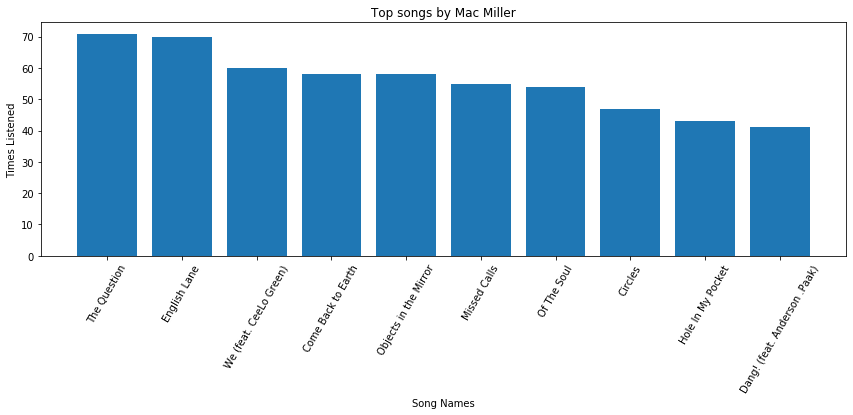

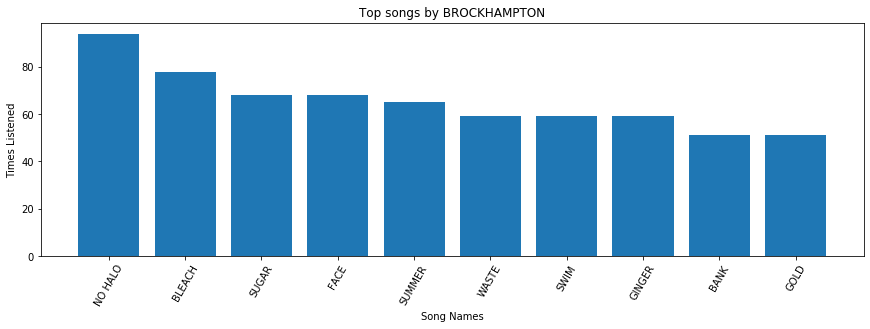

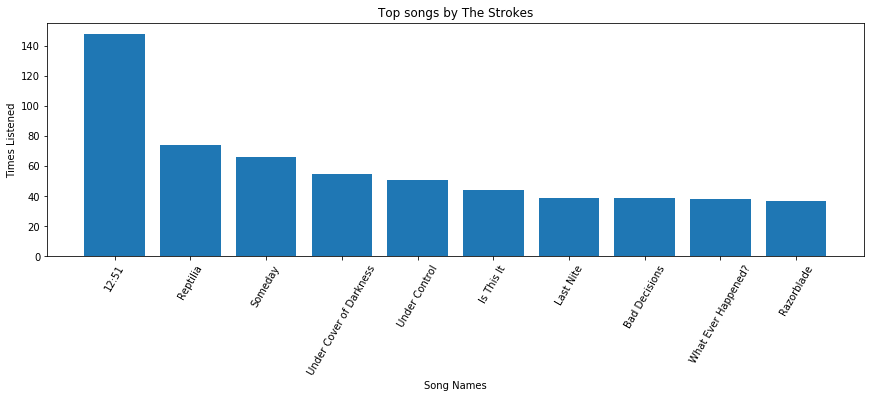

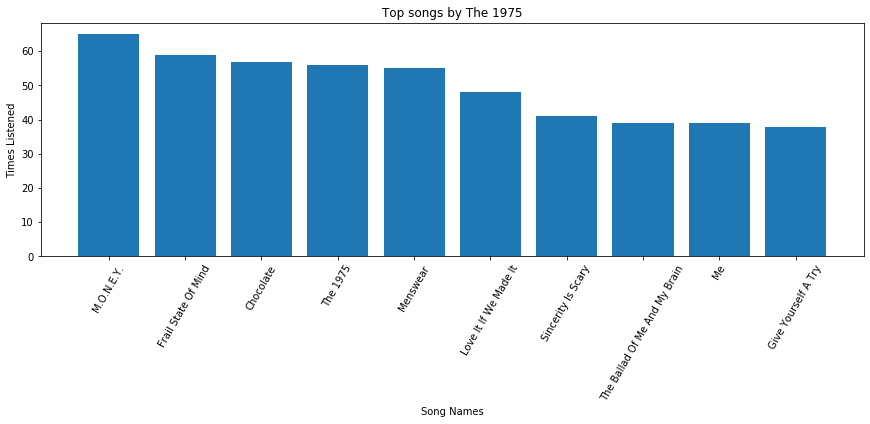

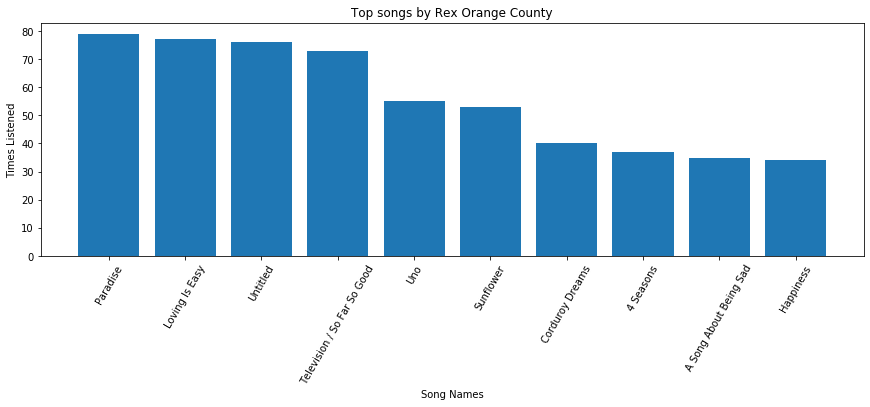

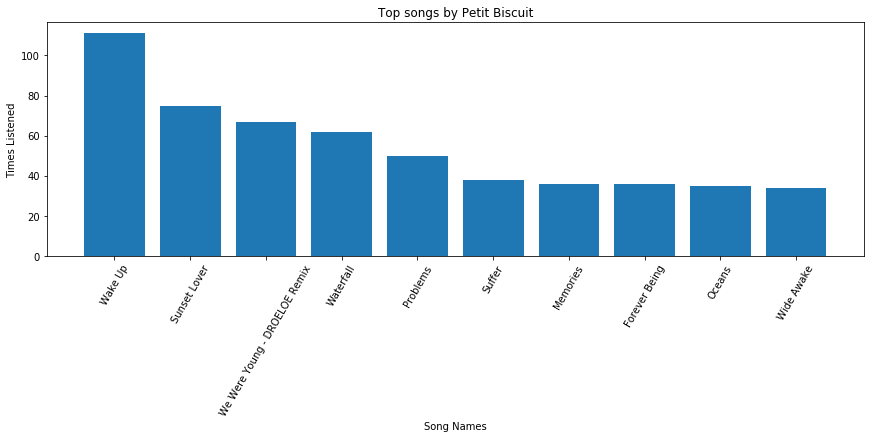

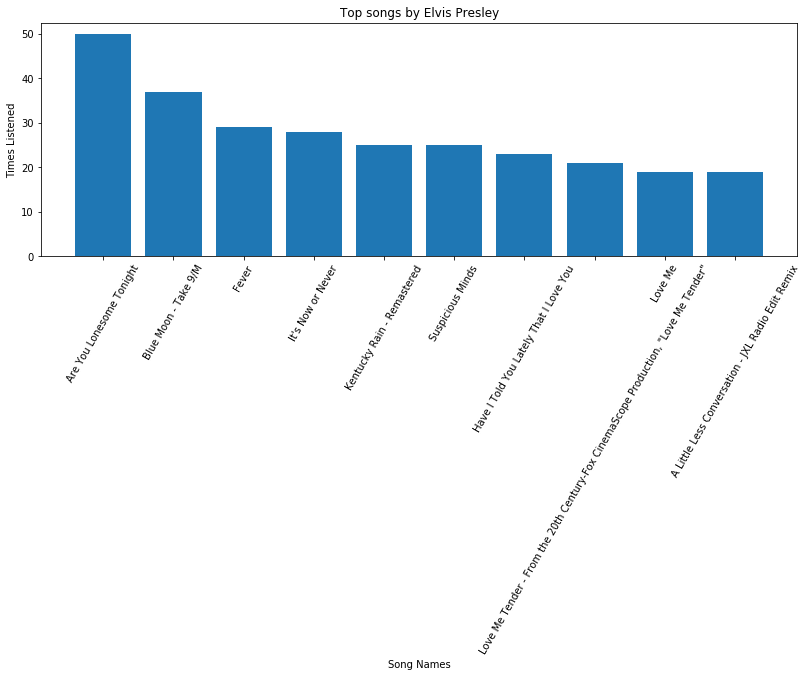

None

Let's look into monthly listening:


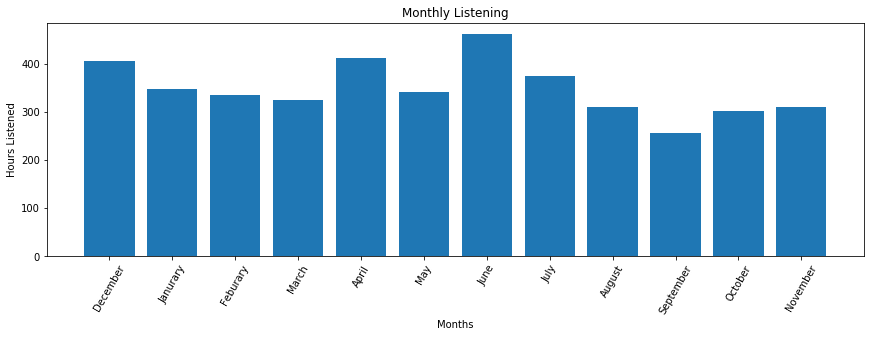

None

Here's the times of day you listed: 


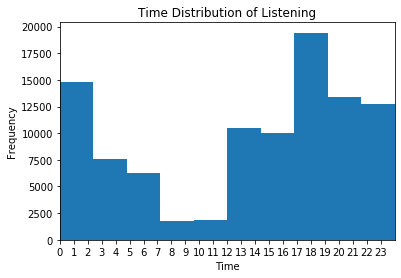

None


In [81]:
print(f'From {printingDates(firstdate)} to {printingDates(lastdate)} you listened to {round(hours_played,2)} hours of music')
#print(f'On Average thats {round(hours_played/(int(lastdate[5:7]) - int(firstdate[5:7])),2)} hours per month ')
#fix this to account for years
print('')
print('During this time you listened to:')
print(f'{num_artists} different artists')
print(f'{num_songs} different songs')
print(' ')
print(f'You seem to really like {top_artist}, you listened to their songs a total of {top_artist_hours} times!')
print(f'Your favorite song seemed to be {fav_song}, you listened to it {fav_song_plays} times')
print('')
print('Here\'s a graph of your top 10 artists:')
print(getArtistGraph())
print('')
print('Here\'s a graph of your top 10 songs:')
print(getSongsGraph())
print('')
print('Here\'s how long you listened to each top artist:')
print(getHoursbyArtist())
print('')
print('Let\'s look further into your favorite artists:')
print(getGraphsforArtists())
print('')
print('Let\'s look into monthly listening:')
print(hoursByMonth())
print('')
print('Here\'s the times of day you listed: ')
print(getTimeGraph())